In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image shape: (294, 316)


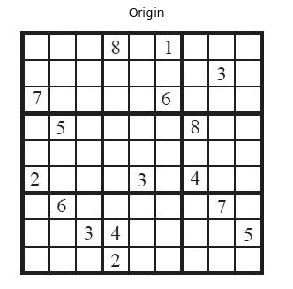

In [2]:
img = cv2.imread("data/sudoku.jpg", 0)

img = np.float32(img)
print(f"image shape: {img.shape}")

plt.figure(figsize=(5,5)), plt.title("Original"), plt.imshow(img, cmap="gray"), plt.axis("off");

# Harris Corner Detection

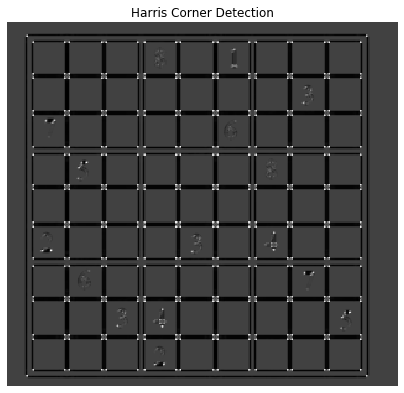

In [3]:
dst = cv2.cornerHarris(src=img, blockSize=2, ksize=3, k=0.04)

plt.figure(figsize=(7,7)), plt.title("Harris Corner Detection"), plt.imshow(dst, cmap="gray"), plt.axis("off");

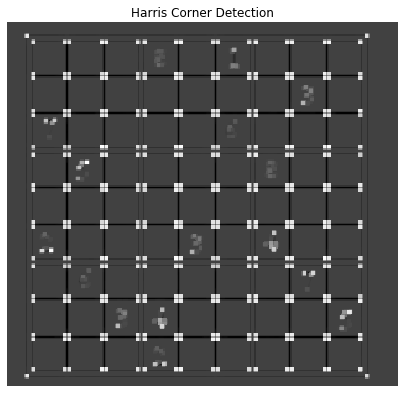

In [4]:
dst = cv2.dilate(src=dst, kernel=None)

img[dst>0.2*dst.max()] = 1

plt.figure(figsize=(7,7)), plt.title("Harris Corner Detection"), plt.imshow(dst, cmap="gray"), plt.axis("off");

# Shi Tomsi Detection

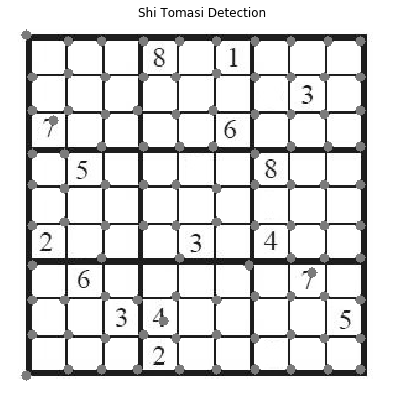

In [5]:
# read img again
img = cv2.imread("data/sudoku.jpg", 0)
img = np.float32(img)

# shi tomsi algorithm
corners = cv2.goodFeaturesToTrack(image=img, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int64(corners)

for i in corners:
    x,y = i.ravel() # flatting
    cv2.circle(img, center=(x,y), radius=4, color=(125,0,125), thickness=cv2.FILLED)
    
plt.figure(figsize=(7,7)), plt.title("Shi Tomasi Detection"), plt.imshow(img, cmap="gray"), plt.axis("off");